# 🛠️ Import Library

---

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from termcolor import colored
from scipy.stats import uniform, randint
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


sns.set()
sns.set_theme(style="whitegrid", palette="deep")


# 📥 Load Data

---

## 🌐 Sumber Data
Dataset yang digunakan adalah **Pistachio Image Dataset**, tersedia di Kaggle.  
Dataset ini berisi **gambar pistachio** yang terbagi ke dalam dua kelas, yaitu **Kirmizi Pistachio** dan **Siit Pistachio**.  
Data ini cocok untuk tugas **image classification**, di mana model machine learning dilatih untuk membedakan kedua jenis pistachio berdasarkan citra.  

👉 [Pistachio Image Dataset – Kaggle](https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset/data)

## 📊 Load Excel
Memuat data tabular (misalnya metadata atau label) dalam format **Excel/CSV** untuk dianalisis lebih lanjut.

In [230]:
excel_file = pd.read_excel("Pistachio_Image_Dataset/Pistachio_28_Features_Dataset/Pistachio_28_Features_Dataset.xlsx",
                   sheet_name="Pistachio_28_Features_Dataset")

excel_file


Area  Perimeter  Major_Axis  Minor_Axis  Eccentricity   Eqdiasq  \
0      63391  1568.4050    390.3396    236.7461        0.7951  284.0984   
1      68358  1942.1870    410.8594    234.7525        0.8207  295.0188   
2      73589  1246.5380    452.3630    220.5547        0.8731  306.0987   
3      71106  1445.2610    429.5291    216.0765        0.8643  300.8903   
4      80087  1251.5240    469.3783    220.9344        0.8823  319.3273   
...      ...        ...         ...         ...           ...       ...   
2143   85983  1157.1160    444.3447    248.8627        0.8284  330.8730   
2144   85691  2327.3459    439.8794    278.9297        0.7732  330.3107   
2145  101136  1255.6190    475.2161    271.3299        0.8210  358.8459   
2146   97409  1195.2150    452.1823    274.5764        0.7945  352.1718   
2147   78466  2356.9080    445.9131    258.5125        0.8148  316.0791   

      Solidity  Convex_Area  Extent  Aspect_Ratio  ...  StdDev_RR  StdDev_RG  \
0       0.8665        73160  0.6394        1.6488  ...    17.7206    19.6024   
1       0.8765        77991  0.6772        1.7502  ...    26.7061    27.2112   
2       0.9172        80234  0.7127        2.0510  ...    19.0129    20.0703   
3       0.9589        74153  0.7028        1.9879  ...    18.1773    18.7152   
4       0.9657        82929  0.7459        2.1245  ...    23.4298    24.0878   
...        ...          ...     ...           ...  ...        ...        ...   
2143    0.9823        87536  0.6799        1.7855  ...    20.8474    20.8118   
2144    0.8886        96439  0.6590        1.5770  ...    21.2621    22.5004   
2145    0.9888       102286  0.7584        1.7514  ...    21.1262    20.0279   
2146    0.9902        98376  0.7635        1.6468  ...    19.3274    19.1782   
2147    0.8662        90591  0.6123        1.7249  ...    24.5451    25.9279   

      StdDev_RB  Skew_RR  Skew_RG  Skew_RB  Kurtosis_RR  Kurtosis_RG  \
0       21.1342   0.4581   0.6635   0.7591       2.9692       3.0576   
1       25.1035  -0.3847  -0.2713  -0.2927       1.9807       2.1006   
2       20.7006  -0.6014  -0.4500   0.2998       3.5420       3.6856   
3       29.7883  -0.6943  -0.6278  -0.7798       2.8776       2.8748   
4       23.1157  -0.9287  -0.8134  -0.4970       2.9915       2.8813   
...         ...      ...      ...      ...          ...          ...   
2143    21.1175  -0.6994  -0.7071  -0.6963       2.8853       2.6599   
2144    21.5821  -0.5567  -0.4968  -0.6597       2.3022       2.2664   
2145    17.4401  -0.9072  -0.8790  -0.4470       3.3112       3.4306   
2146    19.8930  -0.9473  -0.8404  -0.3153       3.4237       2.9606   
2147    24.4214  -0.7993  -0.5962  -0.3492       2.5278       2.2248   

      Kurtosis_RB              Class  
0          2.9542  Kirmizi_Pistachio  
1          2.2152  Kirmizi_Pistachio  
2          4.1012  Kirmizi_Pistachio  
3          2.8953  Kirmizi_Pistachio  
4          2.7362  Kirmizi_Pistachio  
...           ...                ...  
2143       2.6317    Siirt_Pistachio  
2144       2.5161    Siirt_Pistachio  
2145       3.0697    Siirt_Pistachio  
2146       3.0033    Siirt_Pistachio  
2147       2.4480    Siirt_Pistachio  

[2148 rows x 29 columns]

In [231]:
excel_file.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

## 📑 Keterangan Fitur Dataset
| **Fitur**         | **Keterangan**                                                                 |
|--------------------|---------------------------------------------------------------------------------|
| **Area**           | Luas objek pistachio pada citra                                                |
| **Perimeter**      | Keliling objek pistachio                                                       |
| **Major_Axis**     | Panjang sumbu mayor (sumbu terpanjang) dari objek                               |
| **Minor_Axis**     | Panjang sumbu minor (sumbu terpendek) dari objek                               |
| **Eccentricity**   | Tingkat keoval-an bentuk objek (mendekati 0 = lingkaran, mendekati 1 = elips)   |
| **Eqdiasq**        | Diameter ekuivalen berdasarkan luas objek                                       |
| **Solidity**       | Perbandingan antara luas objek dengan luas convex hull                         |
| **Convex_Area**    | Luas convex hull dari objek pistachio                                          |
| **Extent**         | Rasio luas objek terhadap bounding box                                         |
| **Aspect_Ratio**   | Rasio panjang sumbu mayor terhadap minor                                       |
| **Roundness**      | Ukuran kebulatan objek                                                         |
| **Compactness**    | Ukuran kepadatan bentuk objek                                                  |
| **Shapefactor_1**  | Faktor bentuk pertama (hasil perhitungan khusus)                               |
| **Shapefactor_2**  | Faktor bentuk kedua                                                            |
| **Shapefactor_3**  | Faktor bentuk ketiga                                                           |
| **Shapefactor_4**  | Faktor bentuk keempat                                                          |
| **Mean_RR**        | Rata-rata nilai warna merah kanal R (Red)                                      |
| **Mean_RG**        | Rata-rata nilai warna hijau kanal G (Green)                                    |
| **Mean_RB**        | Rata-rata nilai warna biru kanal B (Blue)                                      |
| **StdDev_RR**      | Standar deviasi nilai warna merah                                              |
| **StdDev_RG**      | Standar deviasi nilai warna hijau                                              |
| **StdDev_RB**      | Standar deviasi nilai warna biru                                               |
| **Skew_RR**        | Skewness (kemiringan distribusi) nilai warna merah                             |
| **Skew_RG**        | Skewness nilai warna hijau                                                     |
| **Skew_RB**        | Skewness nilai warna biru                                                      |
| **Kurtosis_RR**    | Kurtosis (keruncingan distribusi) nilai warna merah                            |
| **Kurtosis_RG**    | Kurtosis nilai warna hijau                                                     |
| **Kurtosis_RB**    | Kurtosis nilai warna biru                                                      |
| **Class**          | Label kelas pistachio (Kirmizi / Siit)                                         |


## 🖼️ Load Image
Mengimpor dataset berupa **gambar pistachio** yang nantinya digunakan dalam proses klasifikasi menggunakan machine learning.

In [232]:
dataset_dir = r"Pistachio_Image_Dataset\Pistachio_Image_Dataset"

kirmizi_dir = os.path.join(dataset_dir, "Kirmizi_Pistachio")
siirt_dir = os.path.join(dataset_dir, "Siirt_Pistachio")

kirmizi_images = [os.path.join(
    kirmizi_dir, f"kirmizi {i}.jpg") for i in range(1, 1233)]
siirt_images = [os.path.join(
    siirt_dir, f"siirt {i}.jpg") for i in range(1, 917)]

all_image_paths = kirmizi_images + siirt_images
excel_file['image_paths'] = all_image_paths

print(
    f"First Kirmizi image path: {kirmizi_images[0]} -> Exists? {os.path.exists(kirmizi_images[0])}")
print(
    f"First Siirt image path: {siirt_images[0]} -> Exists? {os.path.exists(siirt_images[0])}")


First Kirmizi image path: Pistachio_Image_Dataset\Pistachio_Image_Dataset\Kirmizi_Pistachio\kirmizi 1.jpg -> Exists? True
First Siirt image path: Pistachio_Image_Dataset\Pistachio_Image_Dataset\Siirt_Pistachio\siirt 1.jpg -> Exists? True


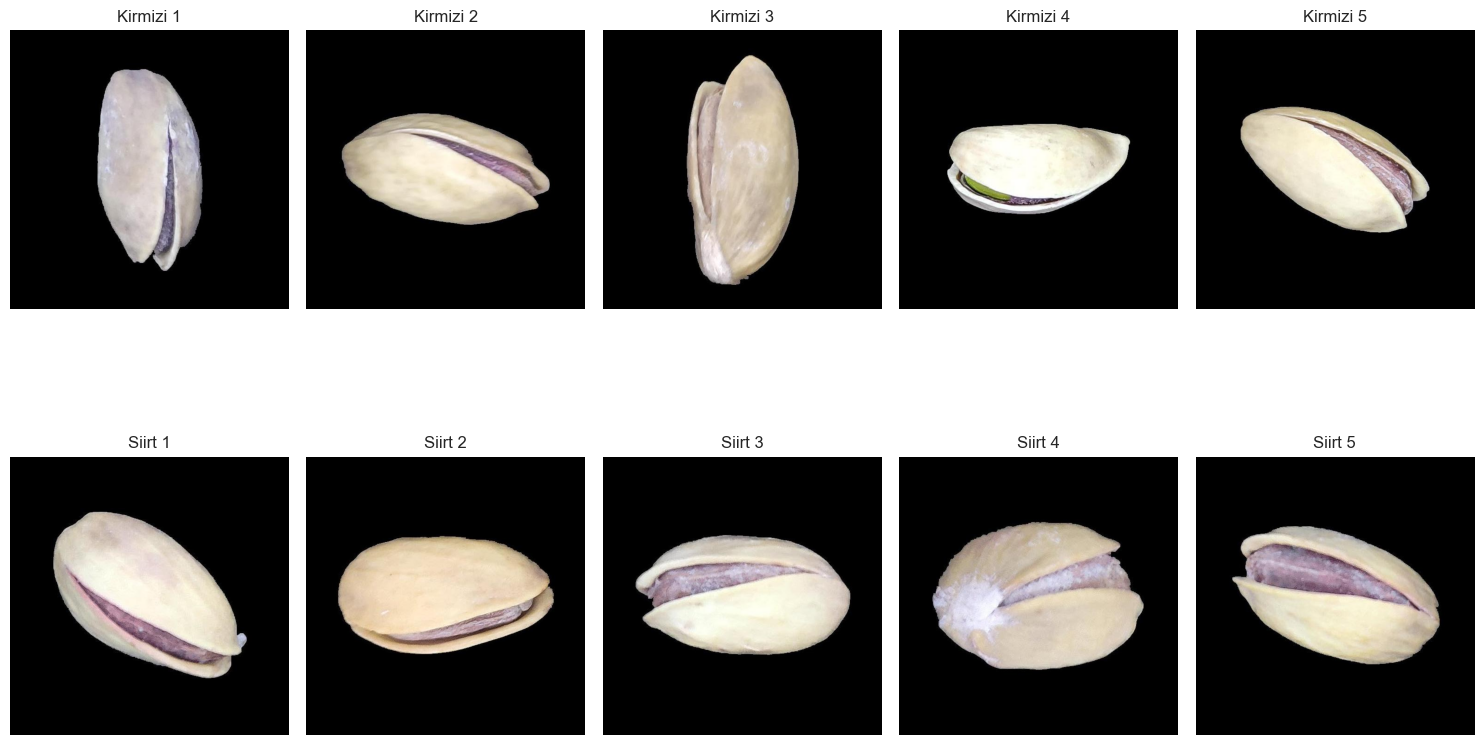

In [233]:
kirmizi_files = os.listdir(kirmizi_dir)
siirt_files = os.listdir(siirt_dir)

plt.figure(figsize=(15, 10))

for idx in range(min(5, len(kirmizi_files))):
    img_path = os.path.join(kirmizi_dir, kirmizi_files[idx])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Kirmizi {idx + 1}")
    plt.axis("off")

for idx in range(min(5, len(siirt_files))):
    img_path = os.path.join(siirt_dir, siirt_files[idx])
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, idx + 6)
    plt.imshow(img_rgb)
    plt.title(f"Siirt {idx + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# 📊 EDA (Exploratory Data Analysis)

---

In [234]:
excel_file.describe()


Area    Perimeter   Major_Axis   Minor_Axis  Eccentricity  \
count    2148.000000  2148.000000  2148.000000  2148.000000   2148.000000   
mean    79950.655493  1425.971751   446.248968   238.311842      0.840219   
std     13121.737799   375.565503    32.445304    30.310695      0.048759   
min     29808.000000   858.363000   320.344500   133.509600      0.504900   
25%     71936.750000  1170.996250   426.508750   217.875825      0.817500   
50%     79905.500000  1262.785500   448.574750   236.416350      0.849650   
75%     89030.500000  1607.906250   468.509400   257.760150      0.875200   
max    124008.000000  2755.049100   541.966100   383.046100      0.946000   

           Eqdiasq     Solidity    Convex_Area       Extent  Aspect_Ratio  \
count  2148.000000  2148.000000    2148.000000  2148.000000   2148.000000   
mean    317.919173     0.940093   85015.839851     0.716067      1.898154   
std      26.908600     0.050452   13154.919327     0.052532      0.240100   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.642850     0.919850   76467.000000     0.687000      1.736375   
50%     318.965300     0.954150   85075.500000     0.726500      1.896250   
75%     336.685525     0.976925   93893.500000     0.753600      2.067025   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

       ...      Mean_RB    StdDev_RR    StdDev_RG    StdDev_RB      Skew_RR  \
count  ...  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000   
mean   ...   191.995311    21.380084    22.591454    22.427056    -0.735243   
std    ...    13.030505     3.127813     3.622222     3.926325     0.384584   
min    ...   146.787600    10.611100    11.985400    11.197100    -1.931600   
25%    ...   182.930675    19.253550    20.036675    19.722425    -0.990900   
50%    ...   192.036350    21.425100    22.523250    22.276900    -0.756600   
75%    ...   201.097725    23.695900    25.241900    25.140125    -0.502500   
max    ...   235.000700    30.838300    33.614600    42.756600     1.865400   

           Skew_RG      Skew_RB  Kurtosis_RR  Kurtosis_RG  Kurtosis_RB  
count  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000  
mean     -0.615580    -0.367142     3.054000     2.903015     2.940572  
std       0.389219     0.426964     0.733993     0.651383     0.750171  
min      -1.658200    -2.348600     1.662400     1.665500     1.522500  
25%      -0.875975    -0.645800     2.509700     2.437400     2.449425  
50%      -0.653050    -0.424550     2.941750     2.807050     2.783350  
75%      -0.405000    -0.158400     3.446500     3.247400     3.224650  
max       2.257600     1.852100     8.890600    10.453900    11.533900  

[8 rows x 28 columns]

In [235]:
feature = excel_file.drop(['Class', 'image_paths'], axis=1)
target = excel_file['Class']


## 📈 Visualizing One Dimension

### 📐 Set up the Plot Size
Menentukan ukuran default untuk setiap plot agar visualisasi lebih jelas dan konsisten.

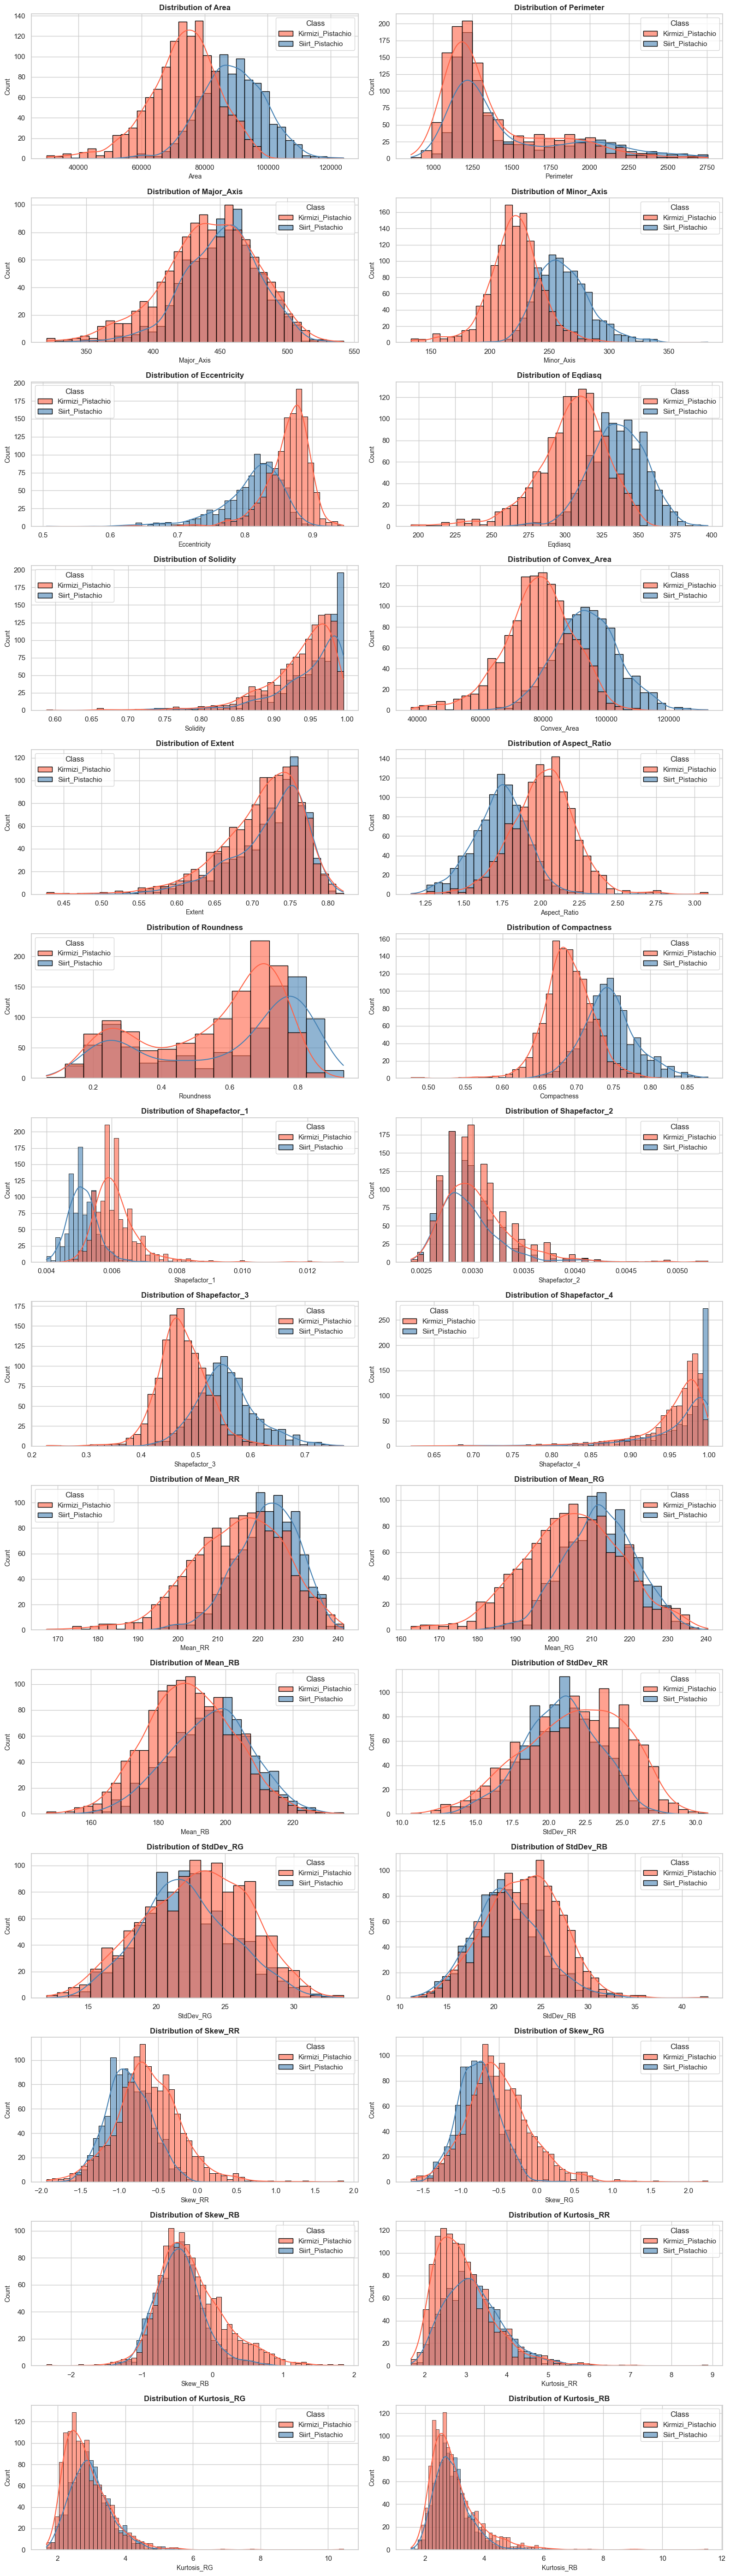

In [236]:
sns.set_style("whitegrid")
palette = {"Kirmizi_Pistachio": "#FF6347",
           "Siirt_Pistachio": "#4682B4"}

num_features = len(feature.columns)
num_rows = int(np.ceil(num_features / 2))

plt.figure(figsize=(16, num_features * 2))

for idx, col in enumerate(feature.columns, start=1):
    plt.subplot(num_rows, 2, idx)

    # Histogram dengan KDE, warna sesuai kelas
    sns.histplot(
        data=excel_file,
        x=col,
        hue='Class',
        kde=True,
        palette=palette,
        edgecolor='black',
        alpha=0.6
    )

    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()


### 📉 KDE Plot
Menggunakan **Kernel Density Estimation (KDE)** untuk melihat distribusi dari fitur numerik.

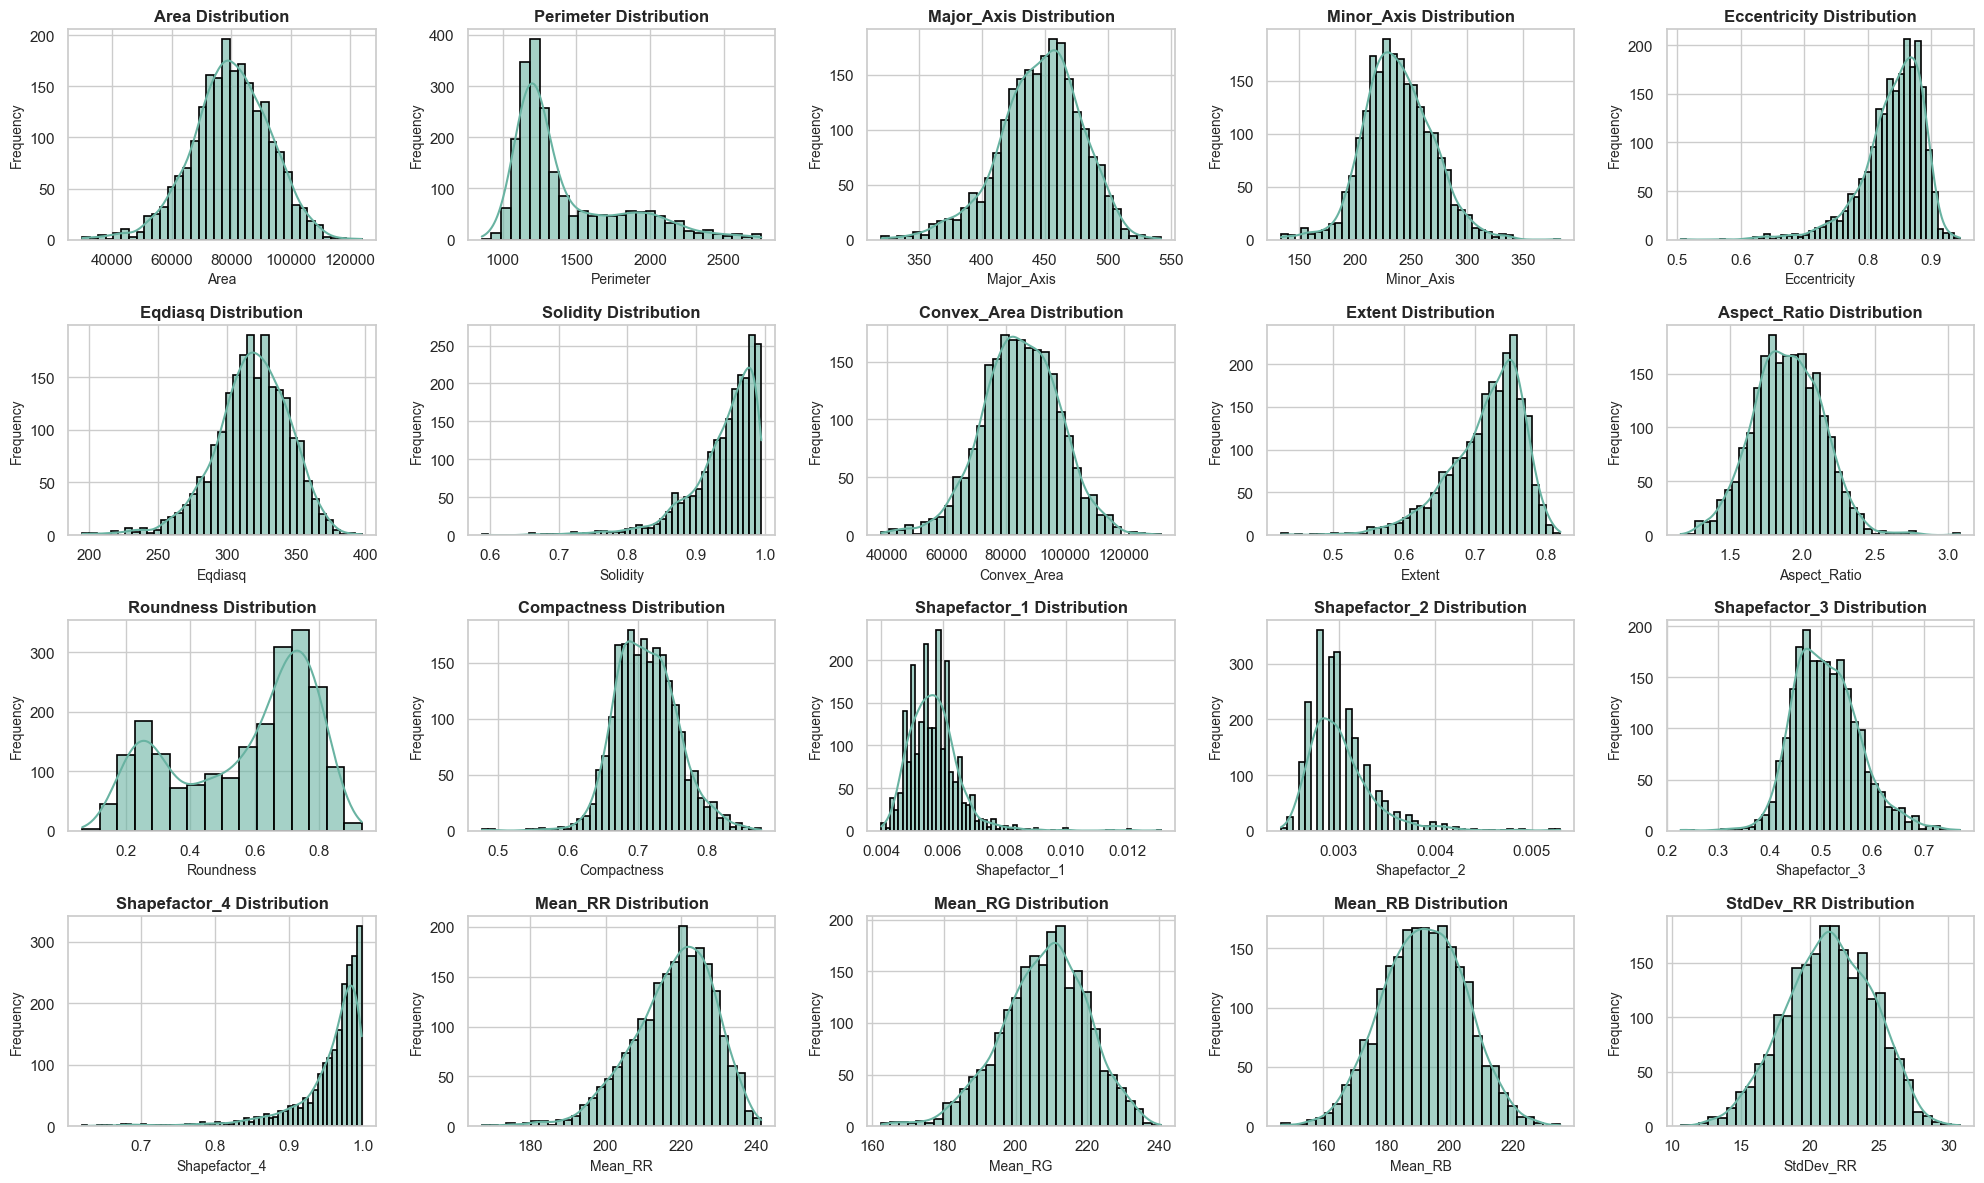

In [237]:
subset_features = feature[:20]
num_features = len(subset_features)
num_cols = 5
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows*3))
axes = axes.flatten()

for ax, col in zip(axes, subset_features):
    sns.histplot(
        data=excel_file,
        x=col,
        kde=True,
        color="#69b3a2",
        edgecolor="black",
        alpha=0.6,
        linewidth=1.2,
        ax=ax
    )
    ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

for ax in axes[len(subset_features):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


### 🧾 Visualization of the Target with Percentages on the Bars
Menampilkan distribusi target (kelas pistachio) dalam bentuk bar chart, disertai persentase pada setiap batang untuk mempermudah interpretasi.


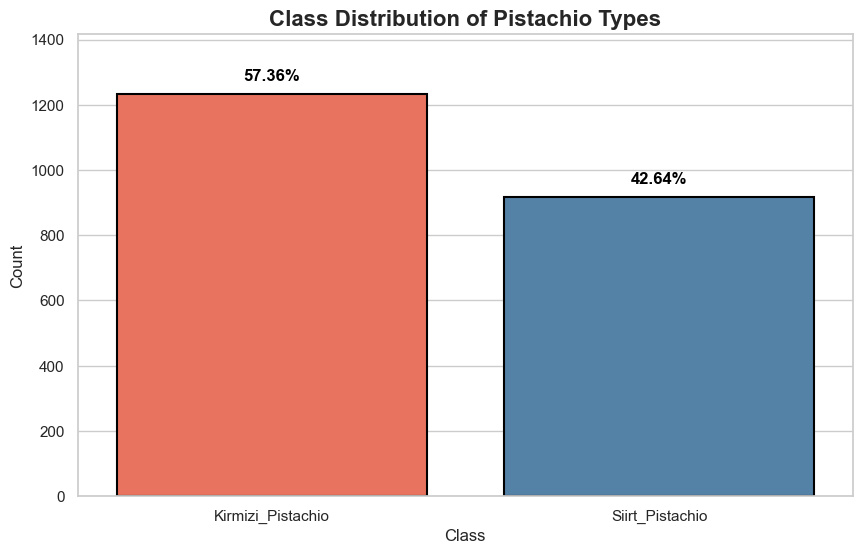

In [238]:
plt.figure(figsize=(10, 6))

palette = {"Kirmizi_Pistachio": "#FF6347",
           "Siirt_Pistachio": "#4682B4"}
ax = sns.countplot(data=excel_file, x='Class',
                   palette=palette, edgecolor='black', linewidth=1.5)

total_count = len(excel_file)

for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold',
                color='black',
                xytext=(0, 8), textcoords='offset points')


plt.title("Class Distribution of Pistachio Types",
          fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=12)
plt.xlabel("Class", fontsize=12)
plt.ylim(0, max(excel_file['Class'].value_counts())
         * 1.15)
plt.show()


## 🔗 Visualizing Two Dimensions

### 🧮 Correlation Matrix
Membuat **heatmap korelasi** antar fitur numerik untuk melihat hubungan linear yang paling kuat.


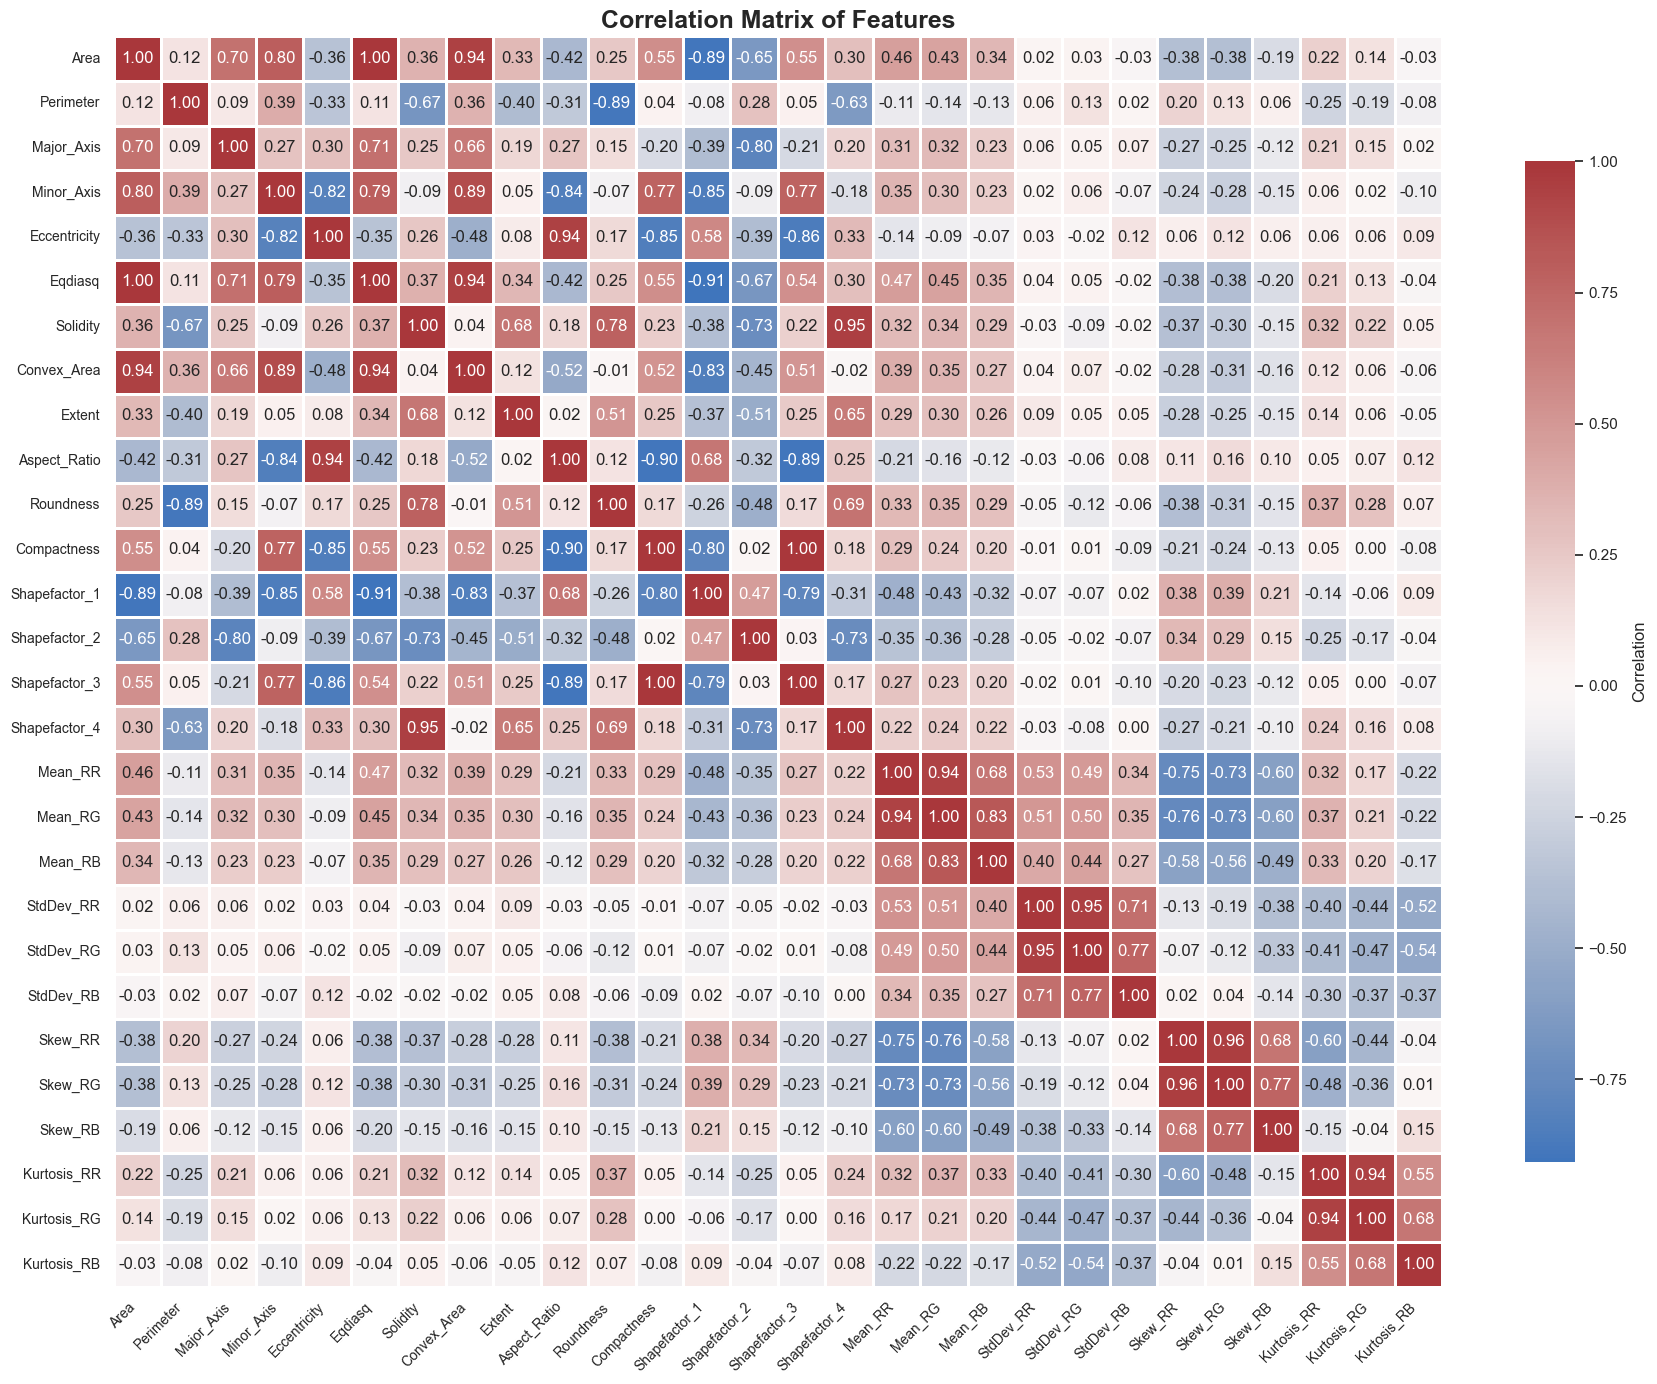

In [239]:
correlation_matrix = excel_file.corr()

# Buat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=1,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)
plt.title("Correlation Matrix of Features", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


### 🕸️ Hierarchical Clustering
Menganalisis hubungan antar fitur dengan metode **clustering hierarki**, sehingga fitur yang mirip dapat dikelompokkan bersama.


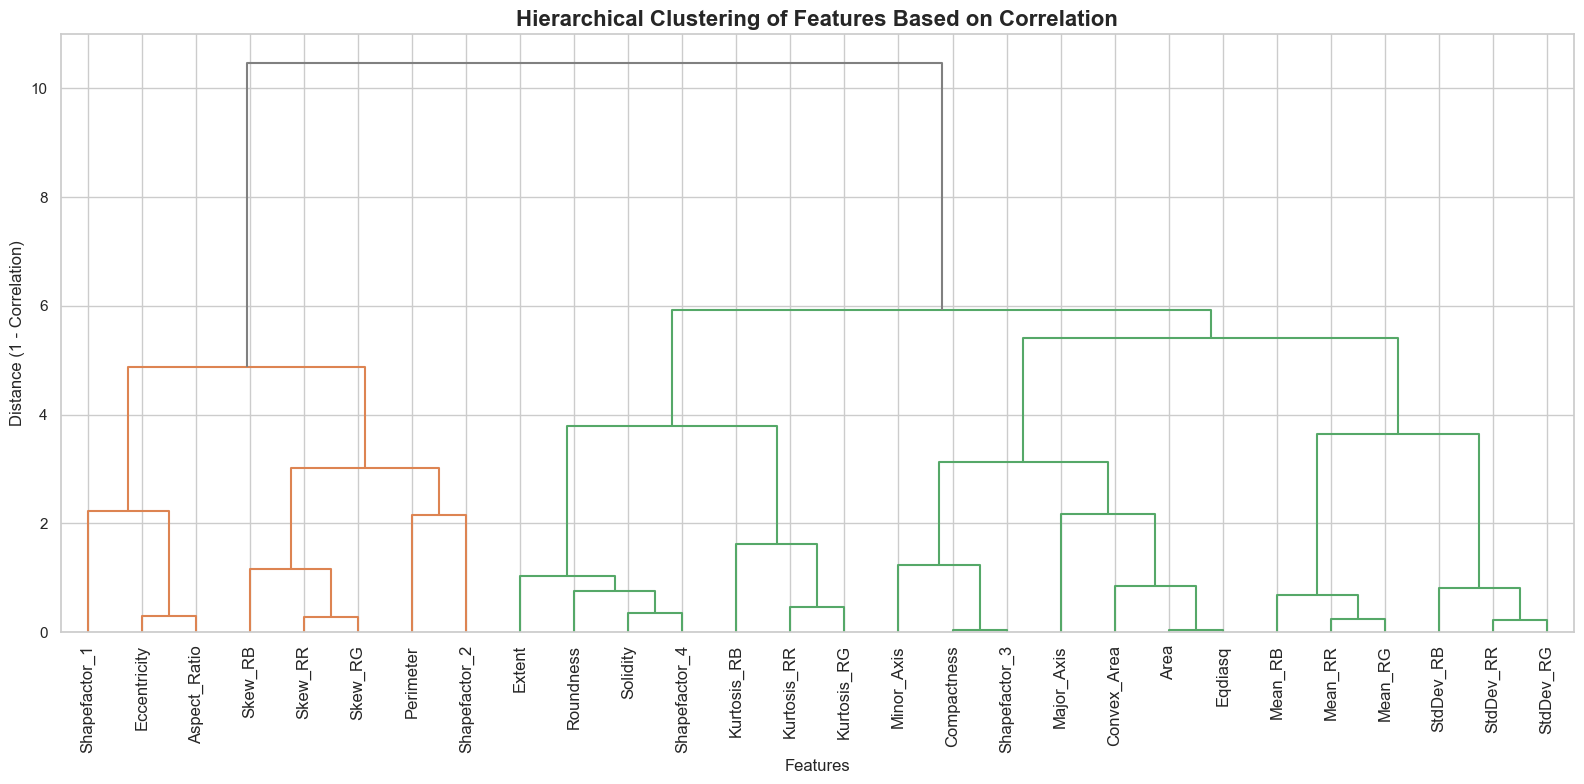

In [240]:
distance_matrix = 1 - correlation_matrix
linked = linkage(distance_matrix, method='ward')
feature_names = feature.columns

plt.figure(figsize=(16, 8))

# Dendrogram dengan warna cabang otomatis
dendrogram(
    linked,
    labels=feature_names,
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=0.7*max(linked[:, 2]),  # threshold untuk warna cluster
    above_threshold_color='gray'
)

plt.title("Hierarchical Clustering of Features Based on Correlation",
          fontsize=16, fontweight='bold')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Distance (1 - Correlation)", fontsize=12)
plt.tight_layout()
plt.show()


### 🪄 Automatic Feature Selection
Menggunakan metode otomatis untuk memilih fitur yang paling relevan.


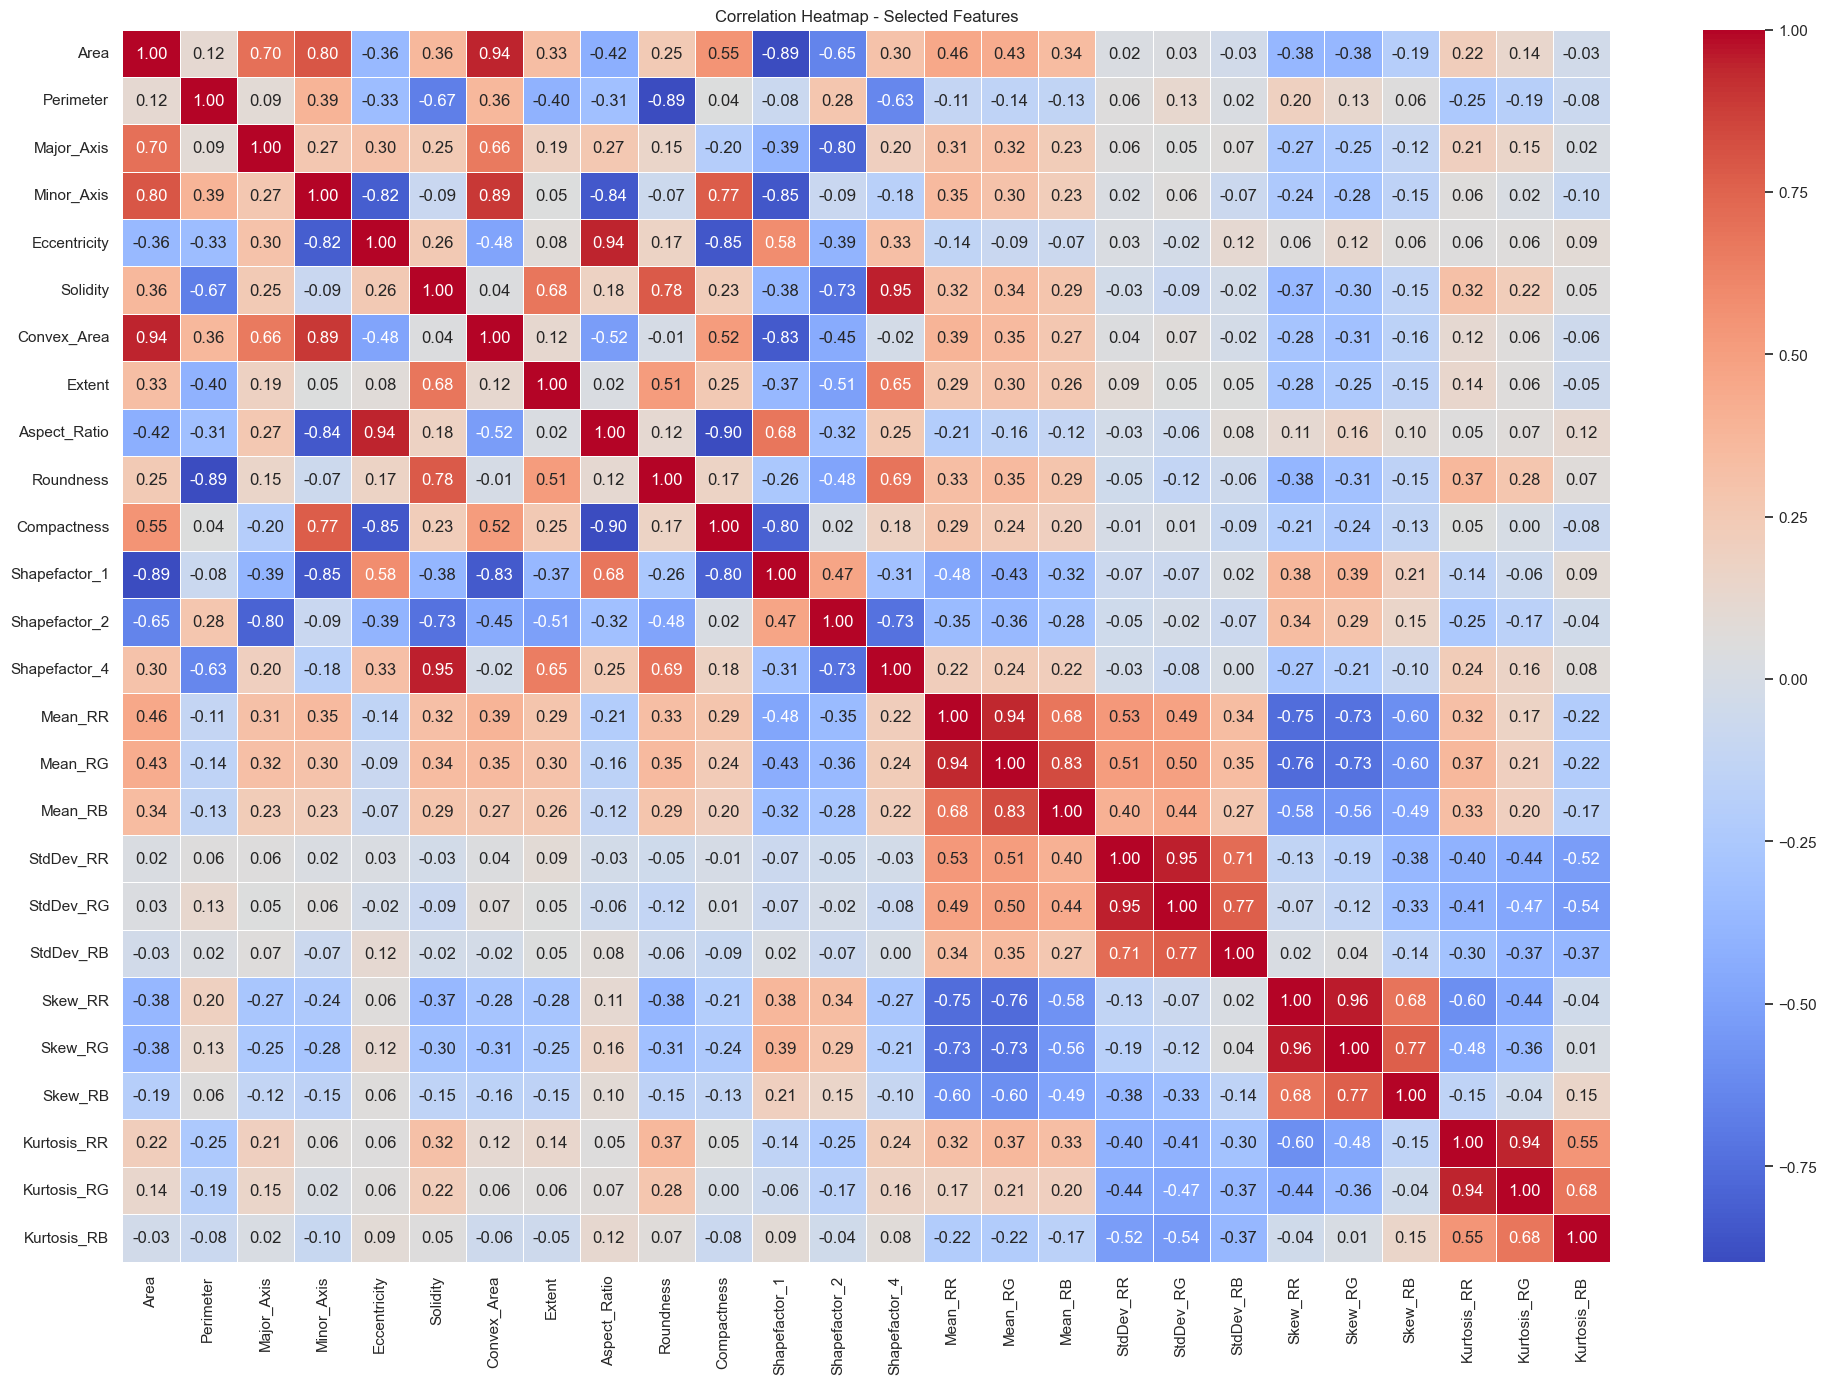

In [241]:
threshold = 0.2  # 1 - 0.8
clusters = fcluster(linked, threshold, criterion='distance')

# Create a dictionary to store representative features from each cluster
selected_x = {}

for i, feature in enumerate(feature):
    cluster_id = clusters[i]
    if cluster_id not in selected_x:
        # Select the first feature in the cluster
        selected_x[cluster_id] = feature

# Convert selected features to a list
final_x = list(selected_x.values())

# Find removed features
removed_x = list(set(feature) - set(final_x))

# Reduced DataFrame with selected features
data_reduced = excel_file[final_x + ['Class']]

# plot Reduced Correlation Matrix after feature selection
plt.figure(figsize=(24, 16))
sns.heatmap(data_reduced[final_x].corr(), annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap - Selected Features")
plt.show()


### 🔵 2 Dimensional Pair-wise Scatter Plot
Visualisasi sebaran data antar fitur secara berpasangan (2D scatter plot) untuk melihat pola kelas.


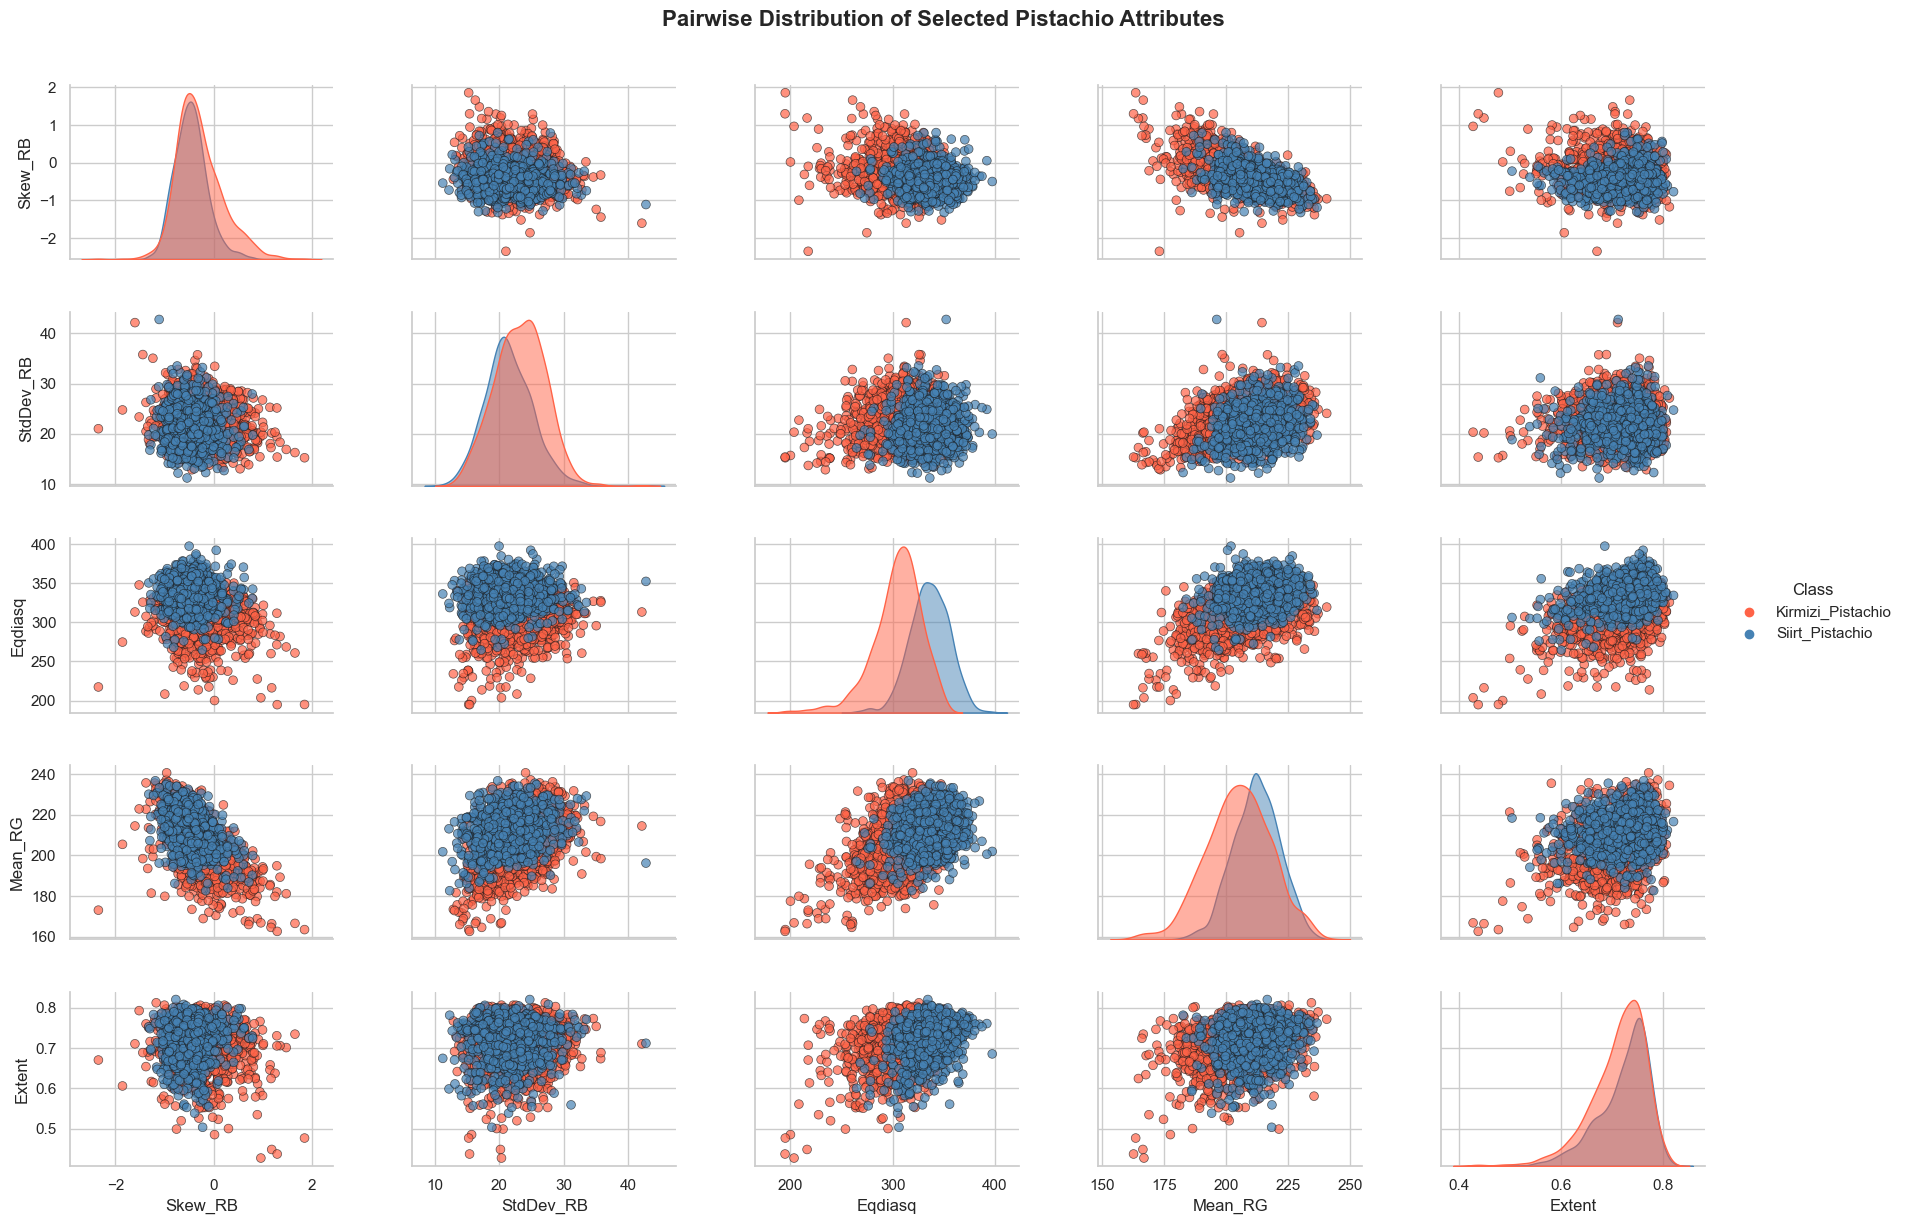

In [242]:
selected_features = ['Skew_RB', 'StdDev_RB', 'Eqdiasq', 'Mean_RG', 'Extent']

# Palette custom untuk kelas
palette = {"Kirmizi_Pistachio": "#FF6347", "Siirt_Pistachio": "#4682B4"}
markers = {"Kirmizi_Pistachio": "o", "Siirt_Pistachio": "o"}

# Create pairplot
pp = sns.pairplot(
    excel_file,
    vars=selected_features,
    hue='Class',
    palette=palette,
    markers=[markers[cls] for cls in excel_file['Class'].unique()],
    plot_kws=dict(edgecolor="k", linewidth=0.5, alpha=0.7, s=40),
    diag_kind="kde",
    diag_kws=dict(shade=True, alpha=0.5),
    aspect=1.4
)

# Adjust figure
fig = pp.fig
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

# Add title
fig.suptitle('Pairwise Distribution of Selected Pistachio Attributes',
             fontsize=16, fontweight='bold')

plt.show()


## 🔴 3 Dimensional Pair-wise Scatter Plot
Visualisasi data dalam bentuk **scatter plot 3D** untuk mengeksplorasi hubungan tiga fitur sekaligus.

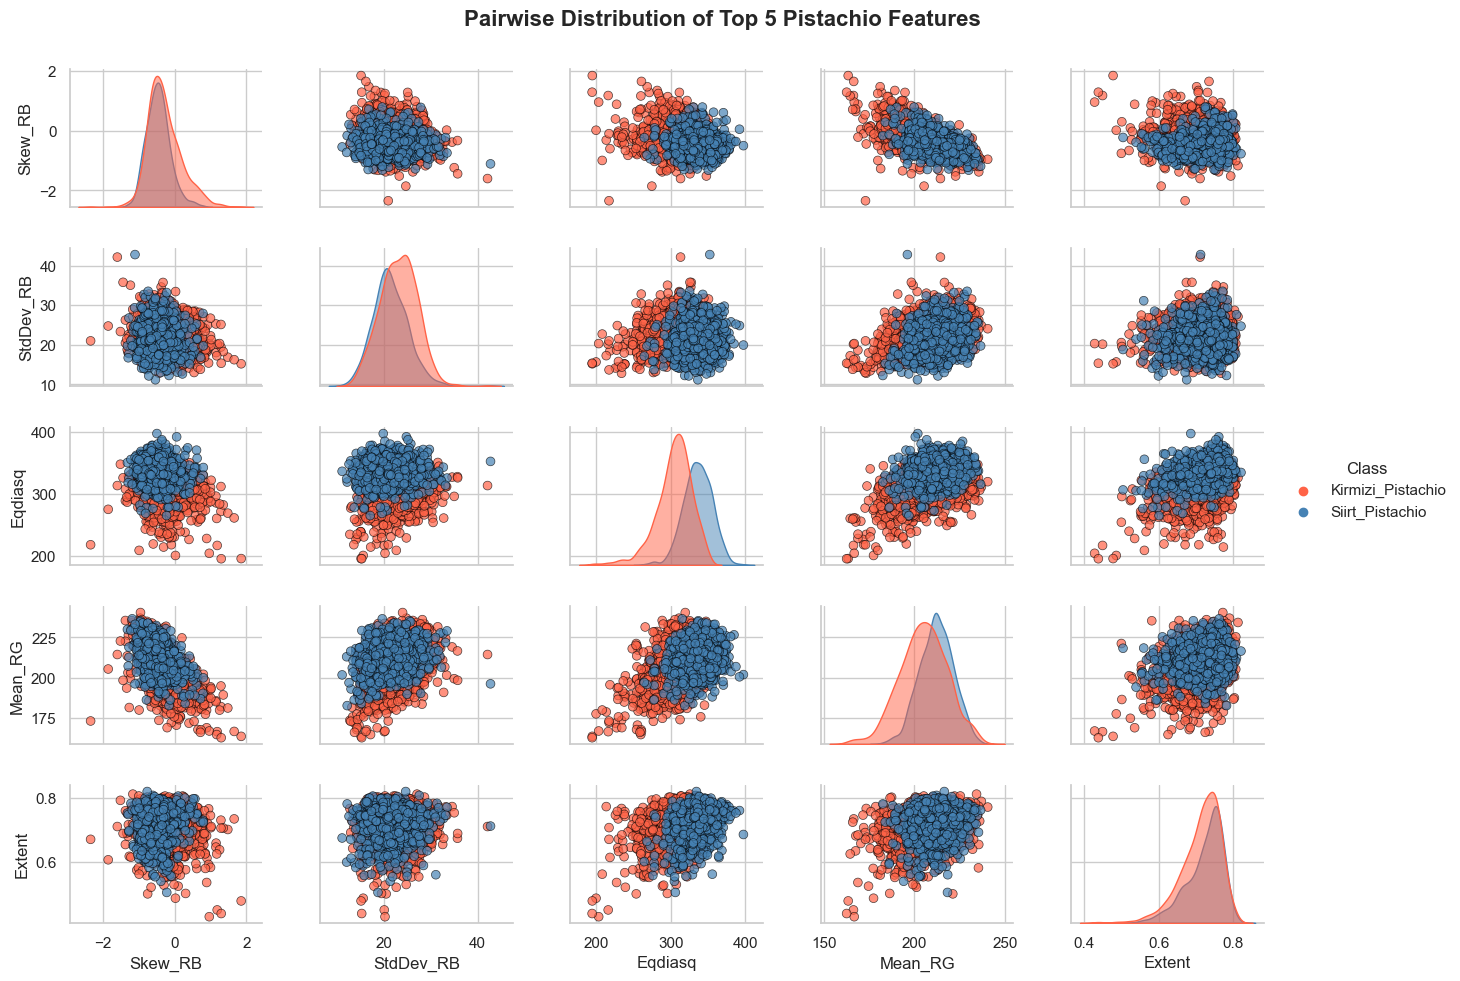

In [243]:
selected_features = ['Skew_RB', 'StdDev_RB', 'Eqdiasq', 'Mean_RG', 'Extent']

# Palette dan marker untuk membedakan kelas
palette = {"Kirmizi_Pistachio": "#FF6347", "Siirt_Pistachio": "#4682B4"}
markers = {"Kirmizi_Pistachio": "o", "Siirt_Pistachio": "o"}

# Create pairplot
pp = sns.pairplot(
    excel_file[selected_features + ['Class']],
    hue='Class',
    palette=palette,
    markers=[markers[cls] for cls in excel_file['Class'].unique()],
    height=2,
    aspect=1.3,
    plot_kws=dict(edgecolor="black", linewidth=0.5, alpha=0.7, s=40),
    diag_kind="kde",
    diag_kws=dict(shade=True, alpha=0.5)
)

# Adjust spacing
fig = pp.fig
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

# Add title
fig.suptitle('Pairwise Distribution of Top 5 Pistachio Features',
             fontsize=16, fontweight='bold')

plt.show()


# ⛏️ Data Mining

---

## 🎛️ Feature and Target Selection
Pada tahap ini dilakukan pemilihan **fitur (X)** sebagai variabel input dan **target (y)** sebagai label keluaran.  
Fitur diambil dari kolom numerik hasil ekstraksi citra, sedangkan target berasal dari kolom **Class** (jenis pistachio).


In [244]:
excel_file = excel_file.sample(frac=1, random_state=347)

feature = excel_file.drop(['Class', 'image_paths'], axis=1)
target = excel_file['Class']
target = target.map({'Siirt_Pistachio': 0, 'Kirmizi_Pistachio': 1})

## 📏 Standardization
Proses **standarisasi** dilakukan untuk menyamakan skala antar fitur.  
Hal ini penting karena perbedaan skala dapat memengaruhi performa algoritma machine learning, terutama yang berbasis jarak (misalnya SVM dan PCA).


In [245]:
scaler = StandardScaler()
feature = scaler.fit_transform(feature)
excel_file.describe()

Area    Perimeter   Major_Axis   Minor_Axis  Eccentricity  \
count    2148.000000  2148.000000  2148.000000  2148.000000   2148.000000   
mean    79950.655493  1425.971751   446.248968   238.311842      0.840219   
std     13121.737799   375.565503    32.445304    30.310695      0.048759   
min     29808.000000   858.363000   320.344500   133.509600      0.504900   
25%     71936.750000  1170.996250   426.508750   217.875825      0.817500   
50%     79905.500000  1262.785500   448.574750   236.416350      0.849650   
75%     89030.500000  1607.906250   468.509400   257.760150      0.875200   
max    124008.000000  2755.049100   541.966100   383.046100      0.946000   

           Eqdiasq     Solidity    Convex_Area       Extent  Aspect_Ratio  \
count  2148.000000  2148.000000    2148.000000  2148.000000   2148.000000   
mean    317.919173     0.940093   85015.839851     0.716067      1.898154   
std      26.908600     0.050452   13154.919327     0.052532      0.240100   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.642850     0.919850   76467.000000     0.687000      1.736375   
50%     318.965300     0.954150   85075.500000     0.726500      1.896250   
75%     336.685525     0.976925   93893.500000     0.753600      2.067025   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

       ...      Mean_RB    StdDev_RR    StdDev_RG    StdDev_RB      Skew_RR  \
count  ...  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000   
mean   ...   191.995311    21.380084    22.591454    22.427056    -0.735243   
std    ...    13.030505     3.127813     3.622222     3.926325     0.384584   
min    ...   146.787600    10.611100    11.985400    11.197100    -1.931600   
25%    ...   182.930675    19.253550    20.036675    19.722425    -0.990900   
50%    ...   192.036350    21.425100    22.523250    22.276900    -0.756600   
75%    ...   201.097725    23.695900    25.241900    25.140125    -0.502500   
max    ...   235.000700    30.838300    33.614600    42.756600     1.865400   

           Skew_RG      Skew_RB  Kurtosis_RR  Kurtosis_RG  Kurtosis_RB  
count  2148.000000  2148.000000  2148.000000  2148.000000  2148.000000  
mean     -0.615580    -0.367142     3.054000     2.903015     2.940572  
std       0.389219     0.426964     0.733993     0.651383     0.750171  
min      -1.658200    -2.348600     1.662400     1.665500     1.522500  
25%      -0.875975    -0.645800     2.509700     2.437400     2.449425  
50%      -0.653050    -0.424550     2.941750     2.807050     2.783350  
75%      -0.405000    -0.158400     3.446500     3.247400     3.224650  
max       2.257600     1.852100     8.890600    10.453900    11.533900  

[8 rows x 28 columns]

## ✂️ Data Splitting
Dataset dibagi menjadi dua bagian utama, yaitu:
- **Training set** → digunakan untuk melatih model  
- **Testing set** → digunakan untuk menguji performa model  

Pembagian data biasanya dilakukan dengan rasio 80:20.

In [246]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42, stratify=target)

# Output the shapes of the train and test sets
print(colored(f"x_train Shape = {x_train.shape}, y_train Shape = {y_train.shape} \nx_test Shape = {x_test.shape}, y_test Shape = {y_test.shape}",'red',attrs = ['bold']))

x_train Shape = (1718, 28), y_train Shape = (1718,) 
x_test Shape = (430, 28), y_test Shape = (430,)


## 🧭 Principal Component Analysis (PCA)
Melakukan **reduksi dimensi** dengan PCA untuk menyederhanakan jumlah fitur tanpa mengurangi informasi penting secara signifikan.  
PCA juga membantu memvisualisasikan data dalam ruang 2D atau 3D, serta mempercepat proses training.

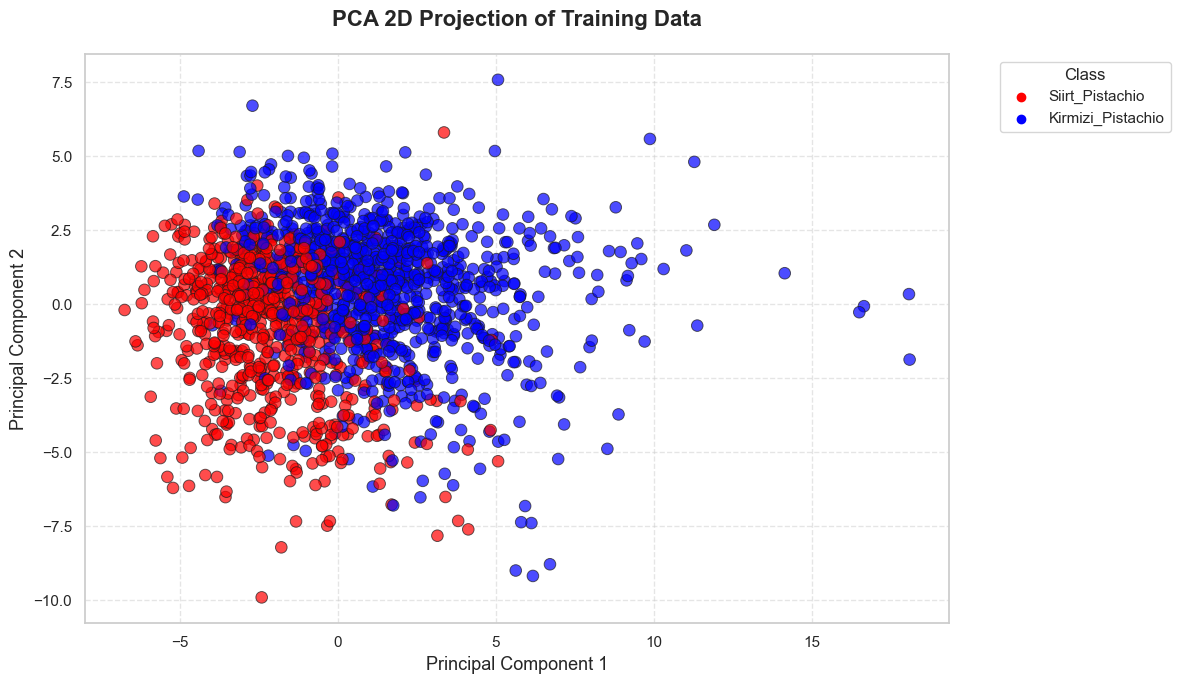

In [247]:
# PCA
pca = PCA(n_components=28)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Gabungkan PCA hasil training dengan label
pca_df = pd.DataFrame({
    'PC1': x_train_pca[:, 0],
    'PC2': x_train_pca[:, 1],
    'Class': y_train
})

# Mapping label (ubah sesuai nama kelas asli di dataset kamu)
label_mapping = {
    0: "Siirt_Pistachio",   # misalnya "Kirmizi"
    1: "Kirmizi_Pistachio"    # misalnya "Siit"
}
pca_df['Class'] = pca_df['Class'].map(label_mapping)

# Plot dengan warna merah & biru
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=pca_df, x="PC1", y="PC2",
    hue="Class", palette={"Siirt_Pistachio": "red", "Kirmizi_Pistachio": "blue"},
    s=70, alpha=0.7, edgecolor="k"
)

# Tambahan visual
plt.title("PCA 2D Projection of Training Data",
          fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Principal Component 1", fontsize=13)
plt.ylabel("Principal Component 2", fontsize=13)
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


# 🚀 Modeling

---

In [248]:
label_mapping = {
    0: "Siirt_Pistachio",
    1: "Kirmizi_Pistachio"
}


## 🌲 Random Forest
Random Forest adalah algoritma berbasis **ensemble learning** yang menggabungkan banyak decision tree.  
Metode ini efektif dalam mengurangi overfitting dan biasanya memberikan performa yang stabil pada data tabular.


🔹 Random Forest Accuracy: 89.07%

Classification Report - Random Forest:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.89      0.92      0.91       247
  Siirt_Pistachio       0.89      0.85      0.87       183

         accuracy                           0.89       430
        macro avg       0.89      0.89      0.89       430
     weighted avg       0.89      0.89      0.89       430



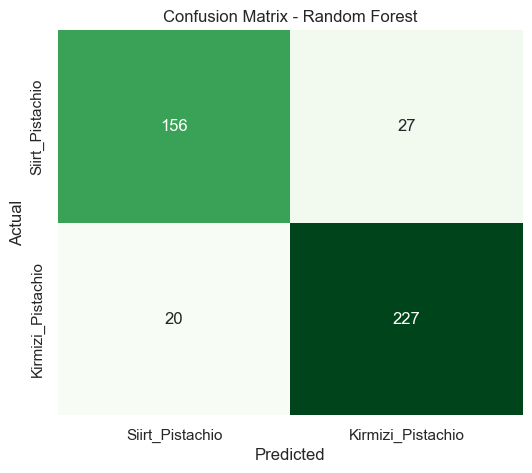

In [249]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_pca, y_train)

# Prediksi
y_pred_rf = rf_model.predict(x_test_pca)

# Akurasi dengan 2 angka desimal
accuracy = accuracy_score(y_test, y_pred_rf) * 100
print(f"🔹 Random Forest Accuracy: {accuracy:.2f}%")

# --- Kembalikan ke nama asli untuk evaluasi ---
y_test_labels = y_test.map(label_mapping)
y_pred_labels = pd.Series(y_pred_rf).map(label_mapping)

# Classification report dengan nama asli
print("\nClassification Report - Random Forest:\n",
      classification_report(y_test_labels, y_pred_labels))

# Confusion matrix dengan label asli
labels = list(label_mapping.values())
cm_rf = confusion_matrix(y_test_labels, y_pred_labels, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🌀 Support Vector Classifier (SVC)
SVC digunakan untuk mencari **hyperplane optimal** yang memisahkan kelas dengan margin terbesar.  
Algoritma ini sangat baik untuk data dengan dimensi tinggi, namun sensitif terhadap parameter kernel.


🔹 SVC Accuracy: 93.02%

Classification Report - SVC:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.95      0.93      0.94       247
  Siirt_Pistachio       0.91      0.93      0.92       183

         accuracy                           0.93       430
        macro avg       0.93      0.93      0.93       430
     weighted avg       0.93      0.93      0.93       430



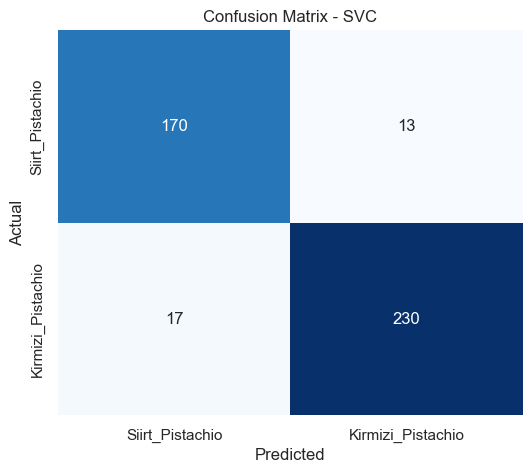

In [250]:
svc_model = SVC(kernel='rbf', random_state=42)
svc_model.fit(x_train_pca, y_train)

y_pred_svc = svc_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_svc) * 100
print(f"🔹 SVC Accuracy: {accuracy:.2f}%")

y_pred_labels = pd.Series(y_pred_svc).map(label_mapping)

print("\nClassification Report - SVC:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_svc = confusion_matrix(y_test_labels, y_pred_labels,
                          labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🎯 Logistic Regression
Logistic Regression merupakan metode klasifikasi sederhana namun kuat, yang bekerja dengan menghitung probabilitas kelas menggunakan fungsi sigmoid.  
Model ini cocok digunakan sebagai baseline karena interpretasinya yang mudah.

🔹 Logistic Regression Accuracy: 91.86%

Classification Report - Logistic Regression:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.93      0.93      0.93       247
  Siirt_Pistachio       0.90      0.91      0.90       183

         accuracy                           0.92       430
        macro avg       0.92      0.92      0.92       430
     weighted avg       0.92      0.92      0.92       430



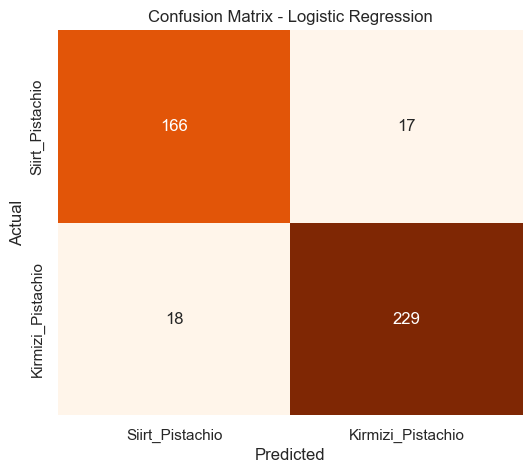

In [251]:
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(x_train_pca, y_train)

y_pred_lr = lr_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_lr) * 100
print(f"🔹 Logistic Regression Accuracy: {accuracy:.2f}%")

y_test_labels = y_test.map(label_mapping)
y_pred_labels = pd.Series(y_pred_lr).map(label_mapping)

print("\nClassification Report - Logistic Regression:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_lr = confusion_matrix(y_test_labels, y_pred_labels,
                         labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🗺️ K-Nearest Neighbors (KNN) Classifier
KNN bekerja dengan prinsip **kemiripan tetangga terdekat**.  
Prediksi dilakukan dengan melihat mayoritas label dari data yang paling dekat dengan sampel uji.


🔹 KNN Accuracy: 90.00%

Classification Report - KNN:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.91      0.91      0.91       247
  Siirt_Pistachio       0.88      0.89      0.88       183

         accuracy                           0.90       430
        macro avg       0.90      0.90      0.90       430
     weighted avg       0.90      0.90      0.90       430



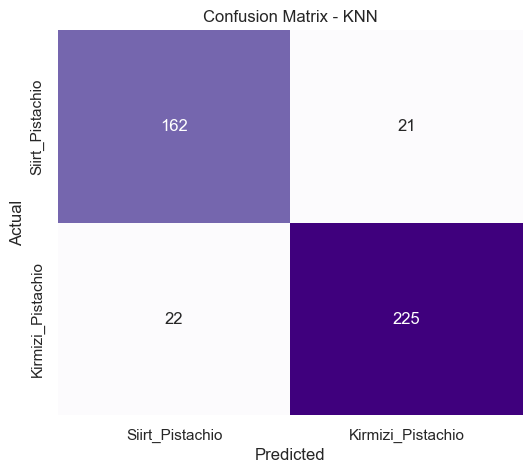

In [252]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_pca, y_train)

y_pred_knn = knn_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(f"🔹 KNN Accuracy: {accuracy:.2f}%")

y_pred_labels = pd.Series(y_pred_knn).map(label_mapping)

print("\nClassification Report - KNN:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_knn = confusion_matrix(y_test_labels, y_pred_labels,
                          labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🔥 AdaBoost Classifier
AdaBoost (Adaptive Boosting) adalah metode ensemble yang menggabungkan banyak weak learners (biasanya decision tree kecil).  
Model ini menyesuaikan bobot pada data yang sulit diklasifikasikan agar hasilnya lebih akurat.


🔹 AdaBoost Accuracy: 91.16%

Classification Report - AdaBoost:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.92      0.92      0.92       247
  Siirt_Pistachio       0.90      0.90      0.90       183

         accuracy                           0.91       430
        macro avg       0.91      0.91      0.91       430
     weighted avg       0.91      0.91      0.91       430



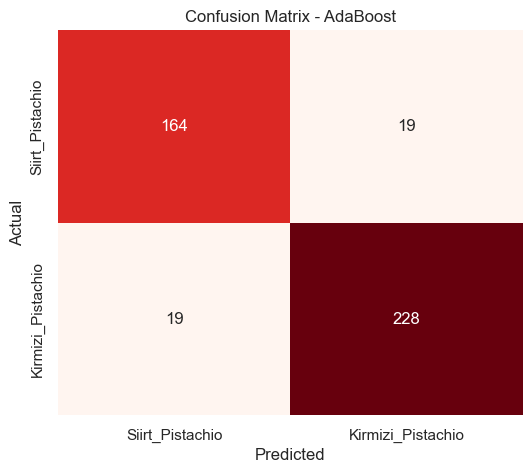

In [253]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train_pca, y_train)

y_pred_ada = ada_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_ada) * 100
print(f"🔹 AdaBoost Accuracy: {accuracy:.2f}%")

y_pred_labels = pd.Series(y_pred_ada).map(label_mapping)

print("\nClassification Report - AdaBoost:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_ada = confusion_matrix(y_test_labels, y_pred_labels,
                          labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🌟 Gradient Boost Classifier
Gradient Boosting bekerja dengan cara **membangun model secara bertahap**, di mana setiap model baru memperbaiki kesalahan dari model sebelumnya.  
Metode ini sering menghasilkan performa tinggi, namun memerlukan tuning parameter yang hati-hati.


🔹 Gradient Boosting Accuracy: 90.93%

Classification Report - Gradient Boosting:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.92      0.92      0.92       247
  Siirt_Pistachio       0.90      0.89      0.89       183

         accuracy                           0.91       430
        macro avg       0.91      0.91      0.91       430
     weighted avg       0.91      0.91      0.91       430



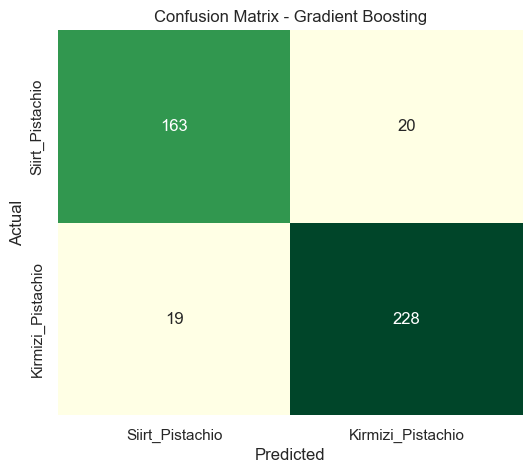

In [254]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(x_train_pca, y_train)

y_pred_gb = gb_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_gb) * 100
print(f"🔹 Gradient Boosting Accuracy: {accuracy:.2f}%")

y_pred_labels = pd.Series(y_pred_gb).map(label_mapping)

print("\nClassification Report - Gradient Boosting:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_gb = confusion_matrix(y_test_labels, y_pred_labels,
                         labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="YlGn", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🧠 Multi-Layer Perceptron (MLP)
MLP adalah salah satu bentuk **artificial neural network** dengan lapisan tersembunyi (hidden layers).  
Model ini mampu mempelajari hubungan non-linear dan sering digunakan untuk data kompleks.

🔹 MLP Accuracy: 93.26%

Classification Report - MLP:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.94      0.95      0.94       247
  Siirt_Pistachio       0.93      0.91      0.92       183

         accuracy                           0.93       430
        macro avg       0.93      0.93      0.93       430
     weighted avg       0.93      0.93      0.93       430



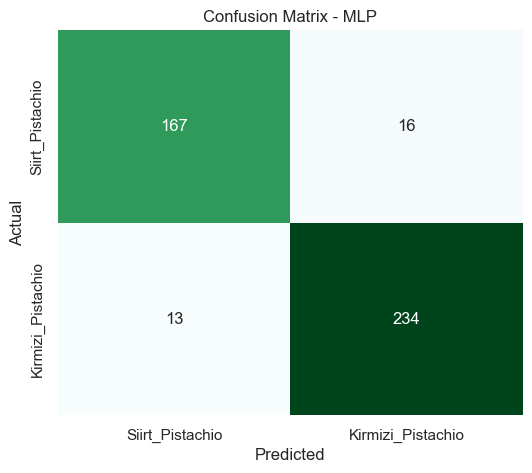

In [255]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                          max_iter=500, random_state=42)
mlp_model.fit(x_train_pca, y_train)

y_pred_mlp = mlp_model.predict(x_test_pca)

accuracy = accuracy_score(y_test, y_pred_mlp) * 100
print(f"🔹 MLP Accuracy: {accuracy:.2f}%")

y_pred_labels = pd.Series(y_pred_mlp).map(label_mapping)

print("\nClassification Report - MLP:\n",
      classification_report(y_test_labels, y_pred_labels))

cm_mlp = confusion_matrix(y_test_labels, y_pred_labels,
                          labels=list(label_mapping.values()))
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="BuGn", cbar=False,
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix - MLP")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 🏆 Conclusion

## 🪧Hasil Perbandingan Model

| Model                  | Accuracy | Precision (avg) | Recall (avg) | F1-Score (avg) |
|-------------------------|----------|-----------------|--------------|----------------|
|  Random Forest        | 89.07%   | 0.89            | 0.89         | 0.89           |
|  Support Vector Classifier                  | 93.02%   | 0.93            | 0.93         | 0.93           |
|  Logistic Regression  | 91.86%   | 0.92            | 0.92         | 0.92           |
|  KNN Classifier       | 90.00%   | 0.90            | 0.90         | 0.90           |
|  AdaBoost             | 91.16%   | 0.91            | 0.91         | 0.91           |
|  Gradient Boost       | 90.93%   | 0.91            | 0.91         | 0.91           |
|  Multi-Layer Perceptron (MLP) | **93.26%** | **0.93** | **0.93** | **0.93** |

---

## 📝 Penjelasan
- **Random Forest** memberikan performa stabil dengan akurasi 89.07%, namun sedikit lebih rendah dibanding model lainnya.  
- **SVC** dan **Logistic Regression** menunjukkan performa yang cukup baik, masing-masing dengan akurasi 93.02% dan 91.86%.  
- **KNN** berada di tengah dengan akurasi 90%, cukup solid tetapi kurang unggul dibanding model berbasis ensemble atau neural network.  
- **AdaBoost** dan **Gradient Boosting** menghasilkan akurasi di kisaran 91%, menunjukkan bahwa boosting mampu memperbaiki performa meski belum menjadi yang terbaik.  
- **MLP (Multi-Layer Perceptron)** tampil sebagai model dengan performa **terbaik**, mencapai akurasi **93.26%**, dengan precision, recall, dan f1-score yang seimbang.

---

## 🔑 Pemilihan Model Terbaik
Model terbaik yang dipilih adalah **🧠 Multi-Layer Perceptron (MLP)** dengan alasan:
1. **Akurasi tertinggi (93.26%)** di antara semua model.  
2. **Keseimbangan metrik** precision, recall, dan f1-score menunjukkan model ini tidak hanya akurat, tetapi juga konsisten dalam mengklasifikasikan kedua kelas (Kirmizi & Siirt).  
3. **Kemampuan menangani non-linearitas** membuat MLP lebih unggul dibanding model tradisional seperti Logistic Regression atau KNN.  